<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Знакомство с данными</a></span></li><li><span><a href="#Проверка-корректности-данных" data-toc-modified-id="Проверка-корректности-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка корректности данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-концентрации-металлов-на-разных-этапах" data-toc-modified-id="Изменение-концентрации-металлов-на-разных-этапах-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение концентрации металлов на разных этапах</a></span></li><li><span><a href="#Сравнение-распределения-размеров-гранул-сырья" data-toc-modified-id="Сравнение-распределения-размеров-гранул-сырья-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравнение распределения размеров гранул сырья</a></span></li><li><span><a href="#Суммарная-концентрация-веществ" data-toc-modified-id="Суммарная-концентрация-веществ-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Суммарная концентрация веществ</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Подготовка-функций-для-расчета-метрики" data-toc-modified-id="Подготовка-функций-для-расчета-метрики-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подготовка функций для расчета метрики</a></span></li><li><span><a href="#Выделение-признаков" data-toc-modified-id="Выделение-признаков-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Выделение признаков</a></span></li><li><span><a href="#Скалирование-признаков" data-toc-modified-id="Скалирование-признаков-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Скалирование признаков</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Обучение моделей</a></span></li><li><span><a href="#Проверка-тестовой-выборки" data-toc-modified-id="Проверка-тестовой-выборки-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Проверка тестовой выборки</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor

In [2]:
try:
    train_sample = pd.read_csv('/datasets/gold_recovery_train_new.csv')
    test_sample = pd.read_csv('/datasets/gold_recovery_test_new.csv')
    raw_data = pd.read_csv('/datasets/gold_recovery_full_new.csv')
except:
    raise Exception('Something is wrong. Check the files')

### Знакомство с данными

In [3]:
# посмотрим на сырые данные
train_sample.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
test_sample.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [5]:
raw_data.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [6]:
train_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [7]:
test_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


### Проверка корректности данных

Нам доступно три датафрейма, где *raw_data* является исходными данными, из которых получили обучающую и тестовую выборки — *train_sample* и *test_sample* соответственно. Всего есть 19439 объектов и 85 признаков, причем, в тестовой выборке присутствуют не все признаки. Нам потребуется рассчитать эффективность обогащения и MAE для расчетов. Расчет произведем на тренировочной выборке для этапа флотации. Нужное значение — *rougher.output.recovery*. Воспользуемся формулой:

$ \Large Recovery = \frac{C * (F - T)}{F * (C - T)} * 100 \%$

где:
- *C* — доля золота в концентрате после флотации/очистки;
- *F* — доля золота в сырье/концентрате до флотации/очистки;
- *T* — доля золота в отвальных хвостах после флотации/очистки.

In [9]:
# вынесем расчеты в функцию
def calc_recovery(df):
    '''Функция вычисляет коэф. обогащения для этапа флотации'''
    nominator = df['rougher.output.concentrate_au'] * (df['rougher.input.feed_au'] - df['rougher.output.tail_au'])
    denominator = df['rougher.input.feed_au'] * (df['rougher.output.concentrate_au'] - df['rougher.output.tail_au'])
    return (nominator / denominator) * 100

In [10]:
# получаем посчитанные значения
calculated_recovery = calc_recovery(train_sample)
# и находим среднее абсолютное отклонение с уже имеющимися данными
mean_absolute_error(train_sample['rougher.output.recovery'], calculated_recovery)

9.73512347450521e-15

Как мы видим, полученное значение очень мало, что говорит о большой схожести в данных. Таким образом мы проверили, что высчитанные коэффициенты в базы данных корректны.

### Предобработка данных

Теперь нам нужно проанализировать отсутствующие признаки в тестовой выборке, а также произвести оставшуюся предобработку данных. В тестовой выборке не хватает 34 признаков и сразу можно заметить, что нет ни одного выходного или вычисленного значения. Есть только только параметры сырья и состояние на каждом этапе, т.е. тестовая выборка не содержит данных о полученных результатах. Все значения, кроме даты, количественные. 

Также видно, что присутствуют пропуски в разном количестве для разных признаков. Так как все наблюдения разбиты по временным интервалам и соседние снятые показания схожи, то можно заполнить пробелы по данным предыдущим по времени. При этом нам важно знать, отсортированы ли данные в датафреймах по времени, поэтому приведем столбцы *date* к типу datetime и отсортируем в хронологическом порядке.

In [11]:
# выведем список недоступных признаков в тестовой выборке
miss_features = raw_data.copy()
miss_features = miss_features.drop(test_sample.columns.tolist(), axis=1).columns.tolist()
miss_features

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

In [12]:
def fill_na(df):
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')
    return df.sort_values('date').fillna(method='ffill', axis=0)

In [13]:
train_sample = fill_na(train_sample)
test_sample = fill_na(test_sample)
raw_data = fill_na(raw_data)

In [14]:
raw_data.isna().sum().sum()

0

Также стоит проверить наличие явных дубликатов. Сделаем это для всех датафреймов и только для столбцов *date*.

In [15]:
dataframes = [train_sample, test_sample, raw_data]
for df in dataframes:
    print(df.duplicated().sum(), df['date'].duplicated().sum())

0 0
0 0
0 0


Явные дубликаты отсутствуют, как для объектов в целом, так и двух и более значений для одной даты и времени. Проверить неявные дубликаты будет затруднительно. Подготовку данных для обучения модели проведем непосредственно перед обучением, а сейчас перейдем к исследовательскому анализу данных.

## Анализ данных

### Изменение концентрации металлов на разных этапах

Сейчас мы хотим посмотреть, есть ли какие-то закономерности изменения концентрации металлов (золото, серебро, свинец) на этапах флотации и двух этапов очистки. 
- Черновой концентрат после флотации на первом этапе очистки: *rougher.output.concentrate...*
- На втором этап очистки: *primary_cleaner.output.concentrate...*
- Финальный: *final.output.concentrate...*

In [16]:
# возьмем названия нужных признаков
metal_au = ['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']
metal_ag = ['rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']
metal_pb = ['rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']
feed_input = ['rougher.input.feed_au', 'rougher.input.feed_pb', 'rougher.input.feed_ag']

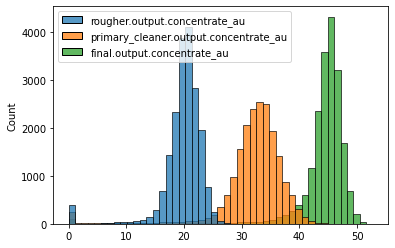

In [17]:
sns.histplot(raw_data[metal_au]);

Как мы видим, содержание золота постепенно увеличивается к концу тех. процесса. Выглядит логично, ведь именно этот металл мы стремимся получить.

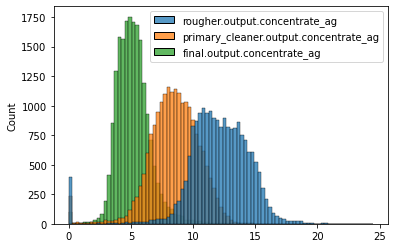

In [18]:
sns.histplot(raw_data[metal_ag]);

А вот содержание серебра напротив уменьшается.

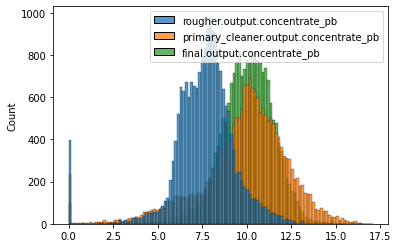

In [19]:
sns.histplot(raw_data[metal_pb]);

Что касается свинца, то после флотации в среднем его количество увеличивается, а после остается примерно на одном уровне.

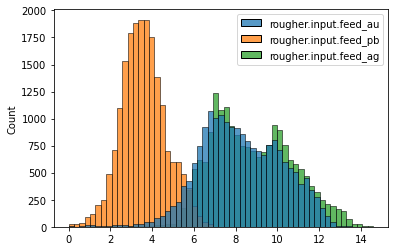

In [20]:
sns.histplot(raw_data[feed_input], multiple='stack');

Мы видим, что золота в исходном сырье обычно меньше, чем свинца или серебра.

### Сравнение распределения размеров гранул сырья

Размер гранул сырья обозначается *...input.feed_size*.

In [21]:
# подготовим только нужные признаки для сравнения
feed_size_rougher = pd.concat([train_sample['rougher.input.feed_size'], test_sample['rougher.input.feed_size']], axis=1)
feed_size_rougher.columns = ['train', 'test']

feed_size_primary_cleaner = pd.concat([train_sample['primary_cleaner.input.feed_size'], 
                                       test_sample['primary_cleaner.input.feed_size']], axis=1)
feed_size_primary_cleaner.columns = ['train', 'test']

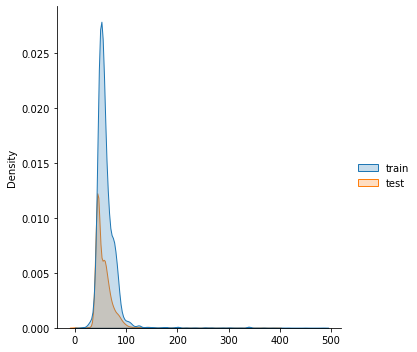

In [22]:
sns.displot(data=feed_size_rougher, kind="kde", fill=True);

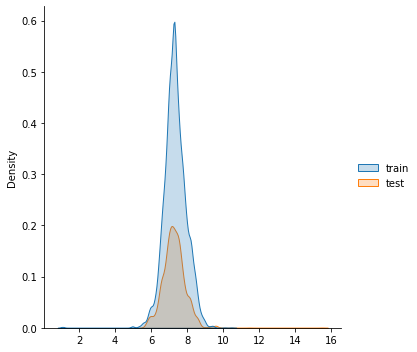

In [23]:
sns.displot(data=feed_size_primary_cleaner, kind="kde", fill=True);

Как мы видим, распределения размеров гранул сырья для обучающей и тестовой выборки похожи друг на друга, поэтому влияние на результат обучения модели не будет оказываться большим.

### Суммарная концентрация веществ

Сейчас мы собираемся измерить суммарную концентрацию всех веществ на разных этапах: в сырье, после флотации и в финальном концентрате.

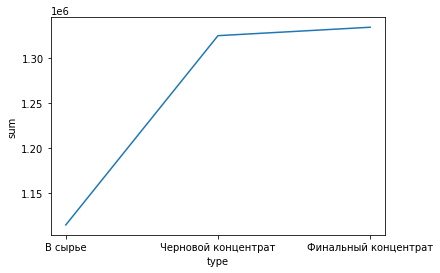

In [24]:
# соберем нужные данные и создадим отдельный датафрейм для визуализации
input_feed_substance = ['rougher.input.feed_ag',
                    'rougher.input.feed_pb',
                    'rougher.input.feed_sol',
                    'rougher.input.feed_au']

rougher_output_substance = ['rougher.output.concentrate_ag', 
                       'rougher.output.concentrate_pb',
                       'rougher.output.concentrate_sol',
                       'rougher.output.concentrate_au']

final_output_substance = ['final.output.concentrate_ag', 
                       'final.output.concentrate_pb',
                       'final.output.concentrate_sol',
                       'final.output.concentrate_au']

feed_sum = raw_data[input_feed_substance].sum().sum()
rougher_sum = raw_data[rougher_output_substance].sum().sum()
final_sum = raw_data[final_output_substance].sum().sum()

values = [
    ['В сырье', feed_sum],
    ['Черновой концентрат', rougher_sum],
    ['Финальный концентрат', final_sum]
]

columns = ['type', 'sum']

sns.lineplot(data=pd.DataFrame(data=values, columns=columns), x='type', y='sum');

В итоге мы видим, что суммарная концентрация веществ на разных этапах растет. Сильнее всего рост после этапа флотации, где происходит обогащение.

In [25]:
pd.set_option('mode.chained_assignment', None)
def check_sum_substances(subs):
    df = raw_data[subs]
    df['sum'] = df[subs].sum(axis=1)
    sns.histplot(df['sum'], kde=True, element="step", fill=False);

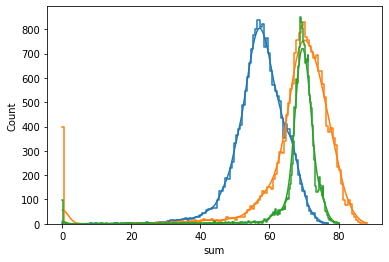

In [26]:
check_sum_substances(input_feed_substance)
check_sum_substances(rougher_output_substance)
check_sum_substances(final_output_substance)

Как мы видим, есть наблюдения, где суммарная концентрация веществ равна нулю или очень близко к нему, чего быть не должно. Это является аномалиями, от которых мы избавимся.

In [27]:
def drop_zero_sum_subs(df, is_test=False):
    if is_test:
        df = df.drop(df.loc[df[input_feed_substance].sum(axis=1).astype('int') == 0].index, axis=0)
        return df
    else:
        subs = [input_feed_substance, rougher_output_substance, final_output_substance]
        for i in subs:
            df = df.drop(df.loc[df[i].sum(axis=1).astype('int') == 0].index, axis=0)
        return df

In [28]:
train_sample = drop_zero_sum_subs(train_sample)
test_sample = drop_zero_sum_subs(test_sample, is_test=True)

## Модель

Так как нам нужно будет предсказывать количественное значение (коэффициент обогащения), то здесь мы будем использовать модели регрессии. Применим кросс-валидацию для получения наилучшего результата, а также будем вычислять метрику sMAPE. Но перед этим нам потребуется закончить подготовку данных, а именно:
1. Подготовить функции для вычисления smape
2. Выделить нужные нам признаки
3. Дозаполнить тестовую выборку
4. Произвести стандартизацию данных признаков
 

### Подготовка функций для расчета метрики

Формула вычисления метрики выглядит следующим образом:

$ \Large sMAPE = \frac{1}{N} \sum_{i=1}^{N} \frac{|y_{true} - y_{pred}|}{(|y_{true}| + |y_{pred}|) / 2} * 100 \% $

Итоговый sMAPE будем считать по формуле:

$ \Large sMAPE = 25 \% * sMAPE(rougher) + 75 \% * sMAPE(final)$

In [29]:
# запишем фукнцию для вычисления sMAPE
def smape(y_true, y_pred):
    return 1/len(y_true) * np.sum(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred)) * 100)

In [30]:
# запишем фукнцию для вычисления итогового sMAPE
def final_smape(smape_rougher, smape_final):
    return .25 * smape_rougher + .75 * smape_final

In [31]:
# создадим оценщик для передачи в аргументах моделей, чтобы сразу получать нужное значение
smape_score = make_scorer(smape, greater_is_better=False)

### Выделение признаков

Нам потребуется спрогнозировать сразу две величины: *rougher.output.recovery* и *final.output.recovery*, чтобы высчитать итоговую метрику. Соответственно, именно они будут целевыми признаками. 

Проверим для начала наличие возможной корреляции между признаками.

<AxesSubplot:>

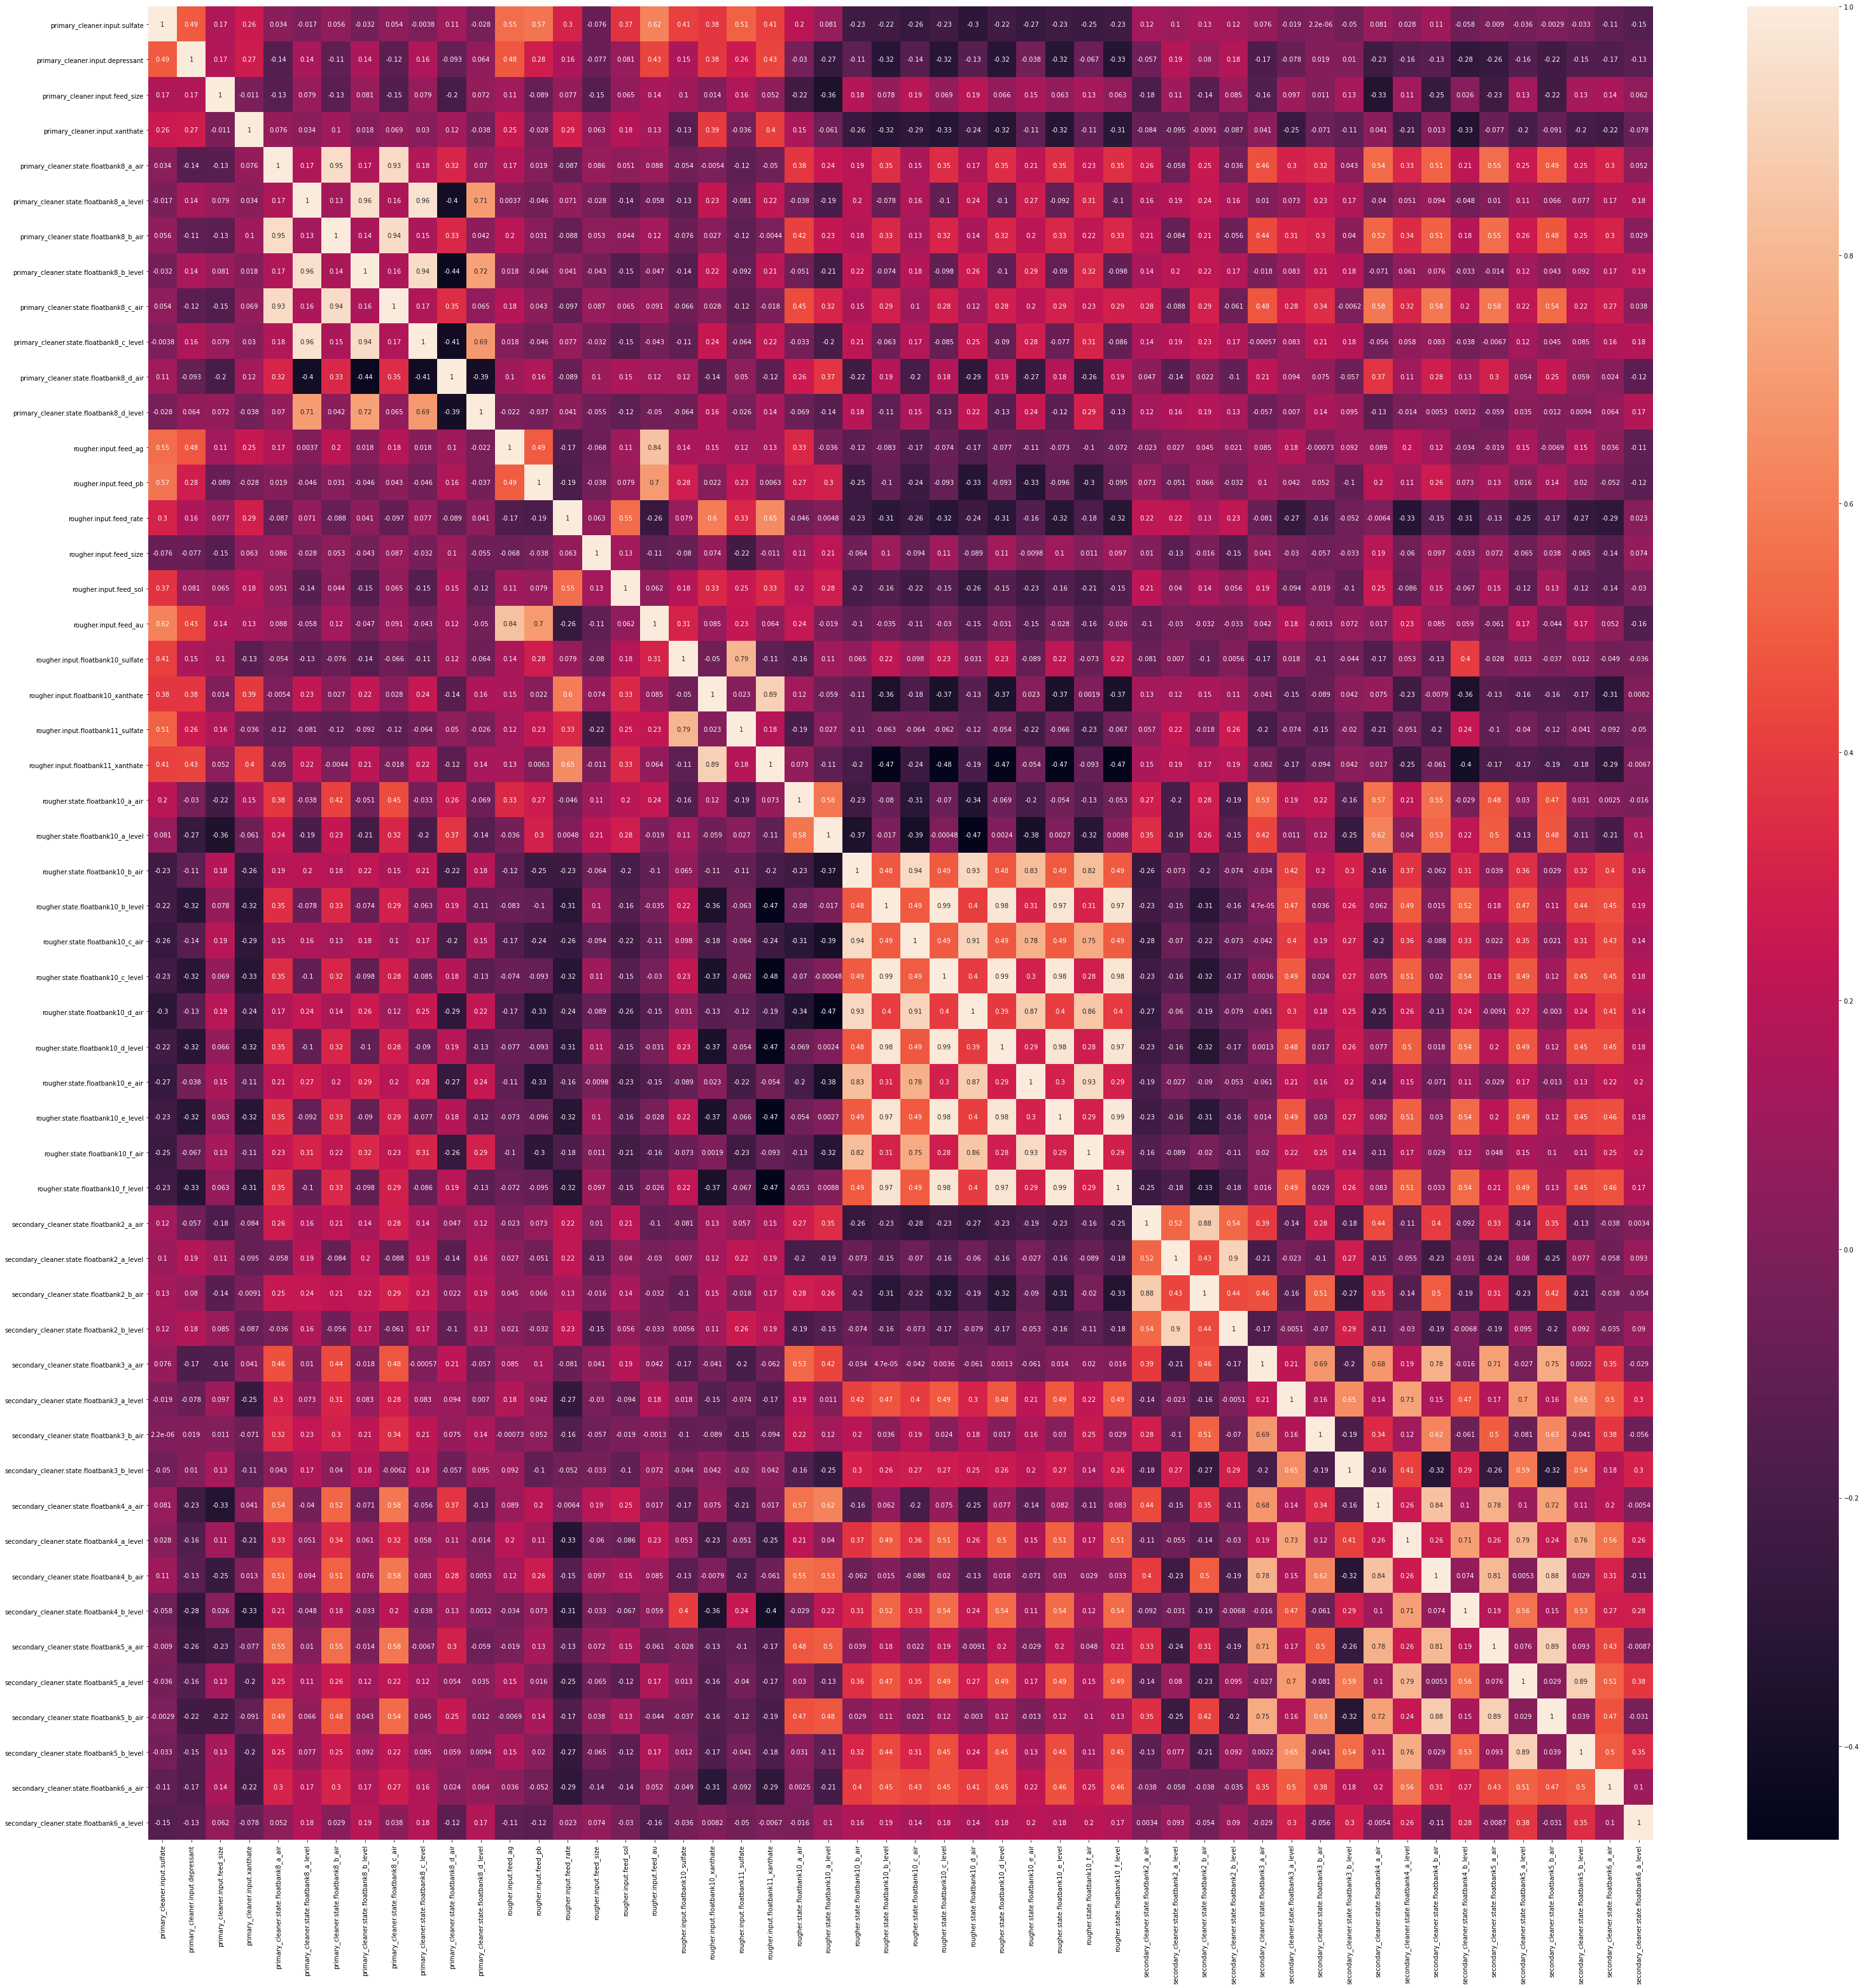

In [32]:
features_columns = test_sample.columns.tolist()
fig, ax = plt.subplots(figsize=(53,53))
sns.heatmap(train_sample[features_columns].corr(), annot=True, ax=ax)

Смотреть в лучшем качестве: https://imageup.ru/img283/4232657/1.png.html

Как мы видим, есть сильная корреляция между разными состояниями флотационной установки. Вероятно, в рамках аппарата есть четкая взаимосвязь изменения уровня воздуха и жидкости для разных этапов. Однако эти состояния в будущем мы скорее всего сможем получать только из показаний датчиков флотационной установки, на входе этих данных для модели не будет, поэтому в качестве признаков мы используем только input значения.

In [33]:
# создадим словарь нужных нам признаков
features_dict = {'rougher_features': ['rougher.input.feed_ag',
                                     'rougher.input.feed_pb',
                                     'rougher.input.feed_rate',
                                     'rougher.input.feed_size',
                                     'rougher.input.feed_sol',
                                     'rougher.input.feed_au',
                                     'rougher.input.floatbank10_sulfate',
                                     'rougher.input.floatbank10_xanthate',
                                     'rougher.input.floatbank11_sulfate',
                                     'rougher.input.floatbank11_xanthate'],

                'final_features': ['primary_cleaner.input.sulfate',
                                     'primary_cleaner.input.depressant',
                                     'primary_cleaner.input.feed_size',
                                     'primary_cleaner.input.xanthate']
                }


In [34]:
# разделяем нужные признаки для двух моделей train
features_rougher = train_sample[features_dict['rougher_features']]                               
target_rougher = train_sample['rougher.output.recovery']
features_final = train_sample[features_dict['final_features']]
target_final = train_sample['final.output.recovery']

In [35]:
# добавим в тестовый набор недостающие целевые признаки
test_sample = test_sample.merge(raw_data[['date', 'rougher.output.recovery', 'final.output.recovery']], on='date')

# разделим признаки для предсказания двух моделей
test_features_rougher = test_sample[features_dict['rougher_features']]
test_target_rougher = test_sample['rougher.output.recovery']
test_features_final = test_sample[features_dict['final_features']]
test_target_final = test_sample['final.output.recovery']

### Скалирование признаков

In [36]:
# опишем функцию преобразования признаков для всех выборок
def scale(features, fit_data):
    scaler = StandardScaler()
    scaler.fit(fit_data)
    features = scaler.transform(features)
    return pd.DataFrame(features)

In [37]:
features_rougher_scaled = scale(features_rougher, features_rougher)
features_final_scaled = scale(features_final, features_final)
test_features_rougher_scaled = scale(test_features_rougher, features_rougher)
test_features_final_scaled = scale(test_features_final, features_final)

features_rougher_scaled.head()

,0,1,2,3,4,5,6,7,8,9
0,-1.312926,-1.117774,0.467649,-0.206471,0.100750,-0.716451,0.088026,0.122796,0.134448,0.146462
1,-1.280668,-1.135122,0.484518,-0.128847,-0.113934,-0.720407,0.083271,0.120769,0.177387,0.151971
2,-1.304387,-1.232901,0.530321,-0.118798,-0.069531,-0.781238,0.067673,0.295406,0.156955,0.308127
3,-1.343238,-1.344834,0.651827,-0.106579,0.111664,-0.908813,-0.021898,0.300692,0.095583,0.301577
4,-1.333886,-1.575409,0.631919,-0.182189,-0.399929,-1.146408,-0.229195,0.296727,-0.101560,0.300210


### Обучение моделей

In [38]:
# обозначим единый рандом
RANDOM_STATE = 999

In [39]:
# запишем функцию для получения кросс-валидации
def cross_train_model(model, features, target):
    '''Функция получает экземпляр модели, признаки и целевой признак,
    после чего производит кросс-валидацию, возвращая средний sMAPE'''
    scores = []
    scores = cross_val_score(model, features, target, cv=5, scoring=smape_score)
    return scores.mean()

In [40]:
# задаем модели
model_linear = LinearRegression()
model_des_tree = DecisionTreeRegressor(random_state=RANDOM_STATE)
model_forest = RandomForestRegressor(random_state=RANDOM_STATE)

# вычисляем среднее sMAPE
scores_linear = cross_train_model(model_linear, features_rougher_scaled, target_rougher)
scores_des_tree = cross_train_model(model_des_tree, features_rougher_scaled, target_rougher)
scores_forest = cross_train_model(model_forest, features_rougher_scaled, target_rougher)

print(scores_linear * -1, scores_des_tree * -1, scores_forest * -1)

6.548308372528322 8.832722166671033 6.408634104995242


Как мы видим, меньшее отклонение происходит у моделей линейной регрессии и случайного леса: примерно 6,5% и 6,4% соответственно. Попробуем подобрать наилучшие гиперпараметры для случайного леса. Есть вероятность, что получится улучшить показатель.

In [41]:
grid_forest = GridSearchCV(model_forest, param_grid={'max_depth': [1,16], 'n_estimators': [10,100]}, scoring=smape_score)
grid_forest.fit(features_rougher_scaled, target_rougher)
print(grid_forest.best_estimator_)
print(grid_forest.best_score_ * -1)

RandomForestRegressor(max_depth=16, random_state=999)
6.410467493262717


Значимо улучшить подбором гиперпараметров не удалось. Случайный лес показывает чуть более лучший результат, чем линейная регрессия. Предскажем и для финального коэф. обогащения.

In [42]:
scores_linear_final = cross_train_model(model_linear, features_final_scaled, target_final)
scores_forest_final = cross_train_model(model_forest, features_final_scaled, target_final)

print(scores_linear_final * -1, scores_forest_final * -1)

9.833085418540426 10.636493197422913


Линейная модель для финальных результатов показывает более лучший результат. Высчитаем финальное sMAPE.

In [43]:
print('Итоговый sMAPE линейной регрессии', final_smape(scores_linear, scores_linear_final) * -1)
print('Итоговый sMAPE случайного леса', final_smape(scores_forest, scores_forest_final) * -1)

Итоговый sMAPE линейной регрессии 9.0118911570374
Итоговый sMAPE случайного леса 9.579528424315995


По результатам итогового sMAPE остановимся на линейной регрессии. Теперь посмотрим, как модель себя поведет на тестовой выборке. 

### Проверка тестовой выборки

In [44]:
def check_test_smape(model, features, target, test_features, test_target):
    model.fit(features, target)
    pred_s = model.predict(test_features)
    return smape(test_target, pred_s)

In [45]:
test_final_rougher = check_test_smape(
    model_linear, features_rougher_scaled, target_rougher, test_features_rougher_scaled, test_target_rougher
)

test_final_final = check_test_smape(
    model_linear, features_final_scaled, target_final, test_features_final_scaled, test_target_final
)

print('Итоговый sMAPE тестовой выборки', final_smape(test_final_rougher, test_final_final))

Итоговый sMAPE тестовой выборки 9.71247363189913


Проверка на тестовой выборке оказалась хуже, но разница не более 1%. Проверим дополнительно на константной модели.

In [46]:
def check_dummy(features, target, test_features, test_target):
    dummy_regr = DummyRegressor(strategy="mean")
    dummy_regr.fit(features, target)
    pred_s = dummy_regr.predict(test_features)
    return smape(test_target, pred_s)

In [47]:
dummy_test_final_rougher = check_dummy(
    features_rougher_scaled, target_rougher, test_features_rougher_scaled, test_target_rougher
)

dummy_test_final_final = check_dummy(
    features_final_scaled, target_final, test_features_final_scaled, test_target_final
)

print('Итоговый sMAPE на константной модели', final_smape(dummy_test_final_rougher, dummy_test_final_final))

Итоговый sMAPE на константной модели 9.826478226249623


Как мы видим, на простом предсказании средних результат получается чуть хуже, значит, можно считать, что наша модель прошла оценку на адекватность.

## Вывод

В ходе данной работы мы исследовали процесс получения золота из руды. Технологический процесс построен на этапе флотации и двух этапов очистки. Нам требовалось предсказать коэффициент обогащения золота в черновом и финальном концентрате золота и высчитать итоговый sMAPE с учетом обоих признаков.

Мы получили и подготовили сырые данные, произведя заполнение пропусков, удаление аномалий суммарных концентраций веществ, выделение нужных признаков и их скалирование. Дополнительно провели исследовательский анализ трех показателей, а именно посмотрели, как меняется концентрация металлов (Au, Ag, Pb) на разных этапах. Интересующий нас металл (золото) ожидаемо показал рост концентрации. Также мы сравнили распределение размера гранул сырья до флотации и до финального результата, чтобы удостовериться, что они похожи друг на друга. В конце посмотрели на изменение суммарного концентрата всех веществ на выходе, и убедились в их росте.

В последней части работы мы завершили подготовку данных для обучения и подготовили функции для расчета sMAPE для конкретного этапа и в общем. После обучали три модели (линейная регрессия, решающее дерево для регрессии и случайный лес для регрессии). Лучший результат sMAPE показала линейная регрессия, которую мы впоследствии проверили на тестовой выборке, получив приемлемый результат. Дополнительно проверили модель на адекватность, получив более худший результат на «тупой» модели.

- Итоговый sMAPE для обучающей выборки ≈ 9%
- Итоговый sMAPE для тестовой выборки ≈ 9,7%